## Logistic_Regression

In [1]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv("C://Users//hp//Desktop//Tableau data sets//Iris.csv")
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white',color_codes=True)

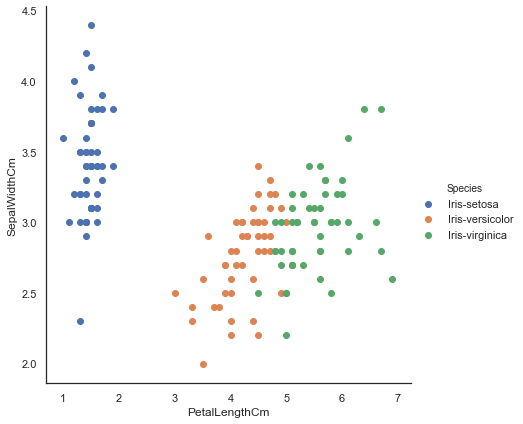

In [4]:
sns.FacetGrid(data,hue="Species",size=6).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend()

In [5]:
floor_mapping = {'Iris-virginica' : 0,'Iris-versicolor' : 1,'Iris-setosa' : 3}
data['Species'] = data['Species'].map(floor_mapping)

In [6]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,3
1,2,4.9,3.0,1.4,0.2,3
2,3,4.7,3.2,1.3,0.2,3
3,4,4.6,3.1,1.5,0.2,3
4,5,5.0,3.6,1.4,0.2,3


### Preparing Input and Output

In [7]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data[["Species"]].values

### Algorithm Implemetation

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Make prediction

In [9]:
expected = y
predicted = model.predict(x)

### Accuracy of model

In [10]:
model.score(x,y)

0.96

### Summarization the fit of model

In [11]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        50
           1       0.98      0.90      0.94        50
           3       1.00      1.00      1.00        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



## Confusion metrics

In [12]:
print(metrics.confusion_matrix(expected, predicted))

[[49  1  0]
 [ 5 45  0]
 [ 0  0 50]]


### Regularization 

In [13]:
model = LogisticRegression(C=100,penalty='l2')
y.flatten()

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
model.fit(x,y.flatten())

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy of model after Regularization

In [15]:
model.score(x,y)

0.98